# Data Pre-processing

Data from: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

1. Data Cleaning
    - Dealing with data types e.g. making categorical data numeric i.e. dummy features
    - Handling missing data (Imputing Na values instead of removing)

2. Data Exploration
    - Detecting outliers (Tukey IQH or Kernal Density Estimation)
    - Plotting Distributions. Log transformation of data that is skewed (very long tails) can impove accuracy.
    - Smote. Balance dataset-to prevent the tree from being biased toward the classes that are dominant. Create an equal number of samples from each class by normalising the sum of the sample weights for each class to the same value.

3. Feature Enigineering
    - Interactions between features
    - Increasing dimensionality vs decreasing dimensionality

4. Feature Selection
    - Discard the least important variables to reduce noise (Decrease dimensionality)
    - Good variables are often constructed using ratios, differences, averages of variables etc. (Increase Dimensionality)


In [2]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Read data and assign NA to missing values
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])


data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print(data.head(5))

      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0  

In [38]:
columns = 'population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,HighCrime,ViolentCrimesPerPop'
cols_final = columns.split(',')
data.drop(data.columns.difference(cols_final), 1, inplace=True) # drop all columns that are not in required list
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,ViolentCrimesPerPop
count,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.00000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,1993.000000
mean,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,27.647642,13.976518,11.836621,...,61.543162,51.532385,77.410772,88.11140,27.429404,2784.258672,3.038148,0.980605,7.768293,589.353914
std,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,6.181506,5.971745,4.778632,...,16.753020,10.516238,10.880634,7.28945,109.846510,2829.562169,4.912029,2.877702,58.179375,614.816135
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,6.750000,11.830000,27.950000,32.83000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,24.420000,11.320000,8.740000,...,50.110000,44.992500,72.060000,85.20000,7.300000,1181.850000,0.360000,0.000000,0.000000,161.730000
50%,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.545000,11.735000,...,64.500000,52.170000,79.495000,90.03000,13.700000,2029.600000,1.220000,0.000000,1.000000,374.070000
75%,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,29.207500,14.347500,14.417500,...,74.862500,58.727500,85.137500,93.01000,26.100000,3322.250000,3.357500,0.000000,3.000000,794.410000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,93.140000,78.560000,96.590000,99.90000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,4877.060000


4877.06


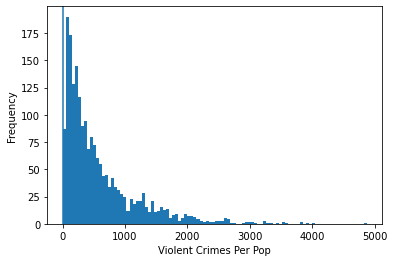

In [28]:
# creating a couple of descriptive plots for the report
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
test = data['ViolentCrimesPerPop']
test.dropna()
print(test.max())
plt.hist(test, 100)
plt.axvline()
plt.xlabel('Violent Crimes Per Pop')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Take a look at the outcome variable i.e. crime
print(data['ViolentCrimesPerPop'].value_counts())

# need to transform this outcome into 0 and 1's, 0 for low crime, 1 for high crime.
# choose a suitable threshold based, < 2500 crimes is low crime, although this is subjective.
data['ViolentCrimesPerPop'] = [0 if x < 795 else 1 for x in data['ViolentCrimesPerPop']]

# Then need to split up the features and outcomes
# So x as a data frame of features and y as a series of the outcome variable
x = data.drop('ViolentCrimesPerPop', 1)
y = data.ViolentCrimesPerPop


print('variables', x.head(5))
print('crime outcome', y.head(5))

223.06     3
190.95     2
103.33     2
144.90     2
624.31     2
          ..
369.24     1
636.96     1
1135.50    1
1502.52    1
112.50     1
Name: ViolentCrimesPerPop, Length: 1972, dtype: int64
variables    population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0       23123           2.82          0.80         95.57          3.44   
1       29344           2.43          0.74         94.33          3.43   
2       16656           2.40          1.70         97.35          0.50   
3       11245           2.76          0.53         89.16          1.17   
4      140494           2.45          2.51         95.65          0.90   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.85        11.01        21.30        10.48       17.18  ...   
1         2.35        11.36        25.88        11.01       10.28  ...   
2         0.70        12.55        25.20        12.19       17.57  ...   
3         0.52        24.46        40.53        28.6

In [40]:
# look at data again to see all variables and then y, the outcome, as 0s and 1s
print(data.head(5))


   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0       23123           2.82          0.80         95.57          3.44   
1       29344           2.43          0.74         94.33          3.43   
2       16656           2.40          1.70         97.35          0.50   
3       11245           2.76          0.53         89.16          1.17   
4      140494           2.45          2.51         95.65          0.90   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.85        11.01        21.30        10.48       17.18  ...   
1         2.35        11.36        25.88        11.01       10.28  ...   
2         0.70        12.55        25.20        12.19       17.57  ...   
3         0.52        24.46        40.53        28.69       12.65  ...   
4         0.95        18.09        32.89        20.04       13.26  ...   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0             77.17           

**Data Cleaning**
- Decide which categorical variables to use in the model

Models can only handle numerical features, so dummy features are created to transform a categorical feature into a set of dummy features, each representing a unique category. In the set of dummy features, 1 indicates that the observation belongs in that category e.g. female would be 1, male 0.

Dummy features dont have to be used for ones with low frequencies, instead, buckets can be used to bucket low frequency categories as 'other'.

In [41]:

# Use get_dummies in pandas (OR OneHotEncoder in scikit learn) to change categorical data to numerical
# print(pd.get_dummies(x['communityname']).head(5))

# Check how many unique categories there are
for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
            col_name=col_name, unique_cat=unique_cat))

# THERE ARE NONE - so skip dummy coding

In [42]:
# select the features which are not numeric
# todummy_list = ['state', 'communityname']

# Dummy all categorical variables used. make them numeric and then missing values can be dealt with.
# def dummy_df(data, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(data[x], prefix=x, dummy_na=False)
#         data = data.drop(x, 1) # dropping the original feature
#         data = pd.concat([data, dummies], axis=1) # adding the one to be used
#     return data
#
# x = dummy_df(x, todummy_list)
# print(x.head(5))

**Removing items with missing data**

Models can't handle missing data, so features with missing data should be removed. Removing data can cause issues if the data is randomly missing because it can cause the loss of a lot of data. However, greater issues arise from removing data if the data is randomly as well as non-randomly missing because this makes it no longer representative of the whole population and can introduce potential biases.

Imputation can be used to replace missing values with another value i.e. the mean, median or highest frequency of a given feature.

In [43]:
# Remove missing values
# First establish how much data is missing
x.isnull().sum().sort_values(ascending=False).head()

# Impute the missing values using SimpleImputer in sklearn.impute
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
x = pd.DataFrame(data=imp.transform(x), columns=x.columns)

In [44]:
# Check if there is still missing data
x.isnull().sum().sort_values(ascending=False).head()

murders             0
PctOccupMgmtProf    0
NumUnderPov         0
PctPopUnderPov      0
PctLess9thGrade     0
dtype: int64

**Outlier Detection**

An outlier = an observation that deviates drastically from other values in the dataset. Decision trees are robust to outliers because they isolate them in small regions of the feature space. Since the prediction for each leaf is the average (for regression), being isolated in seperate leaves, outliers won't influence the rest of the predictions/ impact the mean of the other leaves.

Natural vs error:
- Naturally occuring error, although not problematic, can skew the model by affecting the slope
- Error is indicative of data quality issues, therefore it it not information that should be used in the model. Imputation can be used to deal with these erroneous values (the same way as dealing with missing data).

Methods of outlier detection include Kernel density estimation or Tukey IQR.

1. Tukey IQR
Identifies extreme values in the data and is favourable to using standard deviation from the mean to detect outliers because Tukey doesn't make assumptions about normality and is less sensitive to extreme values.

(Interquartile ranges). To find most most extreme values, use a diff multiplier to 1.5.

Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

One limitation of Tukey IQR outlier detection is that it does not capture outliers in a bimodal distribution, but rather extreme values, like Kernal Density Estimation can.

In [45]:
# find outliers using Tukey IQR
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr # The floor = less than the first quartile minus the IQR.
    ceiling = q3 + 1.5*iqr # The ceiling = more than the third quartile plus the IQR.
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)]) # If the value is below the floor, or above the ceiling, it is an outlier
    outlier_values = list(x[outlier_indices]) # indices to access these data points later

    return outlier_indices, outlier_values

# for example, check the outliers for ‘medIncome’
tukey_indices, tukey_values = find_outliers_tukey(x['medIncome'])
print(np.sort(tukey_values))

# tukey_list = []
# for column in x:
#     tukey_indices, tukey_values = find_outliers_tukey(x[column])
#     tukey_list.append(tukey_values) # We need ID though

# NOTE: What are we going to do with outliers?

[ 68654.  68742.  69019.  69695.  69904.  69917.  70000.  70039.  70287.
  70919.  71274.  71905.  71996.  72369.  74124.  74401.  74472.  74825.
  75221.  75905.  76907.  77530.  78965.  79092.  79579.  79797.  80968.
  81957.  83275.  83975.  84441.  84498.  86674.  87686.  89395.  91951.
  95134. 100077. 101320. 110550. 118456. 123625.]


**Distribution of Features**
- Plotting frequency histograms to show the distribution of a given feature.

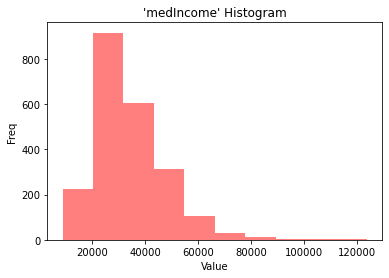

In [46]:
# plot histograms using matplotlib
def histo_plot(x):
    plt.hist(x,color='red', alpha=0.5)
    plt.title("'{var_name}' Histogram".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.show()

# plot histograms to show the distributions of given features
# for column in x: # Get all variable distributions
#     histo_plot(x[column])
histo_plot(x['medIncome'])

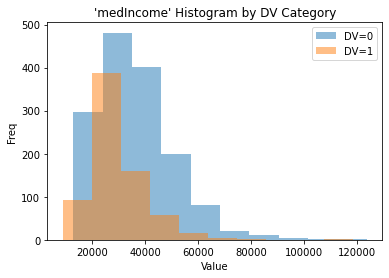

In [47]:
# histograms showing the distribution of features by the outcome variable (dependent variable)
def histogram_dv(a, b):
    plt.hist(list(a[b==0]), alpha=0.5, label='DV=0')
    plt.hist(list(a[b==1]), alpha=0.5, label='DV=1')
    plt.title("'{var_name}' Histogram by DV Category".format(var_name=a.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.legend(loc='upper right')
    plt.show()

# these show the distribution of a feature when the outcome is 0, so crime is less than .../none
# for column in x: # Get all variable distributions
#     histogram_dv(x[column], y)
histogram_dv(x['medIncome'], y)

**Feature Engineering**

Either 1. increase the dimensionality or 2. decrease the dimentionality

1. Increasing Dimensionality
= creating new features. This is useful if the impact of two or more features on the outcome is non-additive. A good automated way to do this is to look for interactions between features.

e.g. a simple 2-way interaction (where X3 is the interaction between X1 and X2):

X3-X1 * X2

However, with lots of features, this grows the data A LOT. Therefore, it is better t use domain knowledge about certain interactions between features so that there aren't too many interaction terms.

Dimensionality has benefits because information is added, however, it is computationally costly i.e. inefficient and also has the potential for overfitting the model. So it is a trade off between creating new useful information vs the potential for overfitting plus the computational cost.

In [48]:
# polynomialFeatures in sklearn.preprocessing to create two-way interactions for ALL features
# from itertools import combinations
# from sklearn.preprocessing import PolynomialFeatures

# def add_interactions(df):
#     # get feature names
#     combos = list(combinations(list(df.columns),2))
#     colnames = list(df.columns) + ['_'.join(x) for x in combos]
#
#     # establish the interactions in the data
#     poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#     df = poly.fit_transform(df)
#     df = pd.DataFrame(df)
#     df.columns = colnames
#
#     # remove the interactions with 0 values
#     noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
#     df = df.drop(df.columns[noint_indicies], axis=1)
#
#     return df
#
# x = add_interactions(x)
# print(x.head(5))

# NOTE: maybe better if two way interactions are created only for SOME features, bc the data set is so large. Way too computationally slow.
# NOTE: maybe select the most significantly correlated interactions from this set?

2. Decreasing dimensionality

Using principal component analysis(PCA), a method that transforms a dataset with many features into its principle components that best summarise the underlying variance in the data.

Each ‘principle component’ is  established by finding the linear combination of features that maximises variance, whilst also ensuring zero correlation with previously calculated principal components.

PCA/ decreasing dimensionality is useful when you have very high-dimensionality data, in order to reduce dimensions, when the dataset has many highly correlated variables because it will take the variance from these to reduce this correlation and when there is poor observation-to-feature ratio.

However, using dimensionality reduction makes the data harder to interpret and understand because the output gives arbitrary principle components, e.g. for interpreting the outcome, principle component number 1 is not as easy to interpret as medIncome. Therefore, in certain contexts, like explaining the results to a client, this would make it difficult to explain the drivers of the target outcome variable.


Split the data

In [49]:
# Split the data into training and test data sets using sklearn.model_selection

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=1)

Normalise the training set

In [50]:

# normalisation computed on the training set
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)

x_train = (x_train - mu)#/sigma
x_test = (x_test - mu)/sigma

In [51]:
np.mean(x_train, axis=0)

population             1.033007e-10
householdsize         -2.219873e-15
racepctblack           2.384148e-15
racePctWhite           3.608218e-14
racePctAsian          -3.029927e-15
                           ...     
LandArea               8.738437e-15
PopDens               -1.015769e-12
PctUsePubTrans        -4.286077e-17
LemasPctOfficDrugUn    7.200323e-16
murders               -3.902481e-15
Length: 103, dtype: float64

In [52]:
# If we have properly sampled the dataset:
# we should get a mean vector for the test set that contains close to zero values.
np.mean(x_test, axis=0)

population            -0.012550
householdsize         -0.070587
racepctblack          -0.032446
racePctWhite           0.046305
racePctAsian          -0.019599
                         ...   
LandArea               0.014078
PopDens                0.034542
PctUsePubTrans        -0.017998
LemasPctOfficDrugUn    0.029594
murders               -0.011230
Length: 103, dtype: float64

In [53]:
# # Using sklearn.decomposition PCA to find the principal components
# from sklearn.decomposition import PCA
#
# # transform entire data set into 10 features
# pca = PCA(n_components=10)
# x_pca = pd.DataFrame(pca.fit_transform(x))
#
# print(x_pca.head(5))

# NOTE: maybe we should leave dimensionality out of the code, but mention it in the report?

**End data processing**